# Packages

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/federico.bindi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Load and prepare data

In [2]:
df_articles = pd.read_csv('_raw/articles_scraped.csv')
df_articles['length'] = df_articles.text.apply(lambda x: len(x))
df_articles

,title,url,tag,text,date,author,length
0,Colombian Mayors at a Crossroads: Co-Govern Wi...,https://insightcrime.org/news/colombian-mayors...,ES,"On the morning of June 4, 2023, during a town...",2023-08-25,ALICIA FLÓREZ AND LARA LOAIZA,12038
1,Colombia's Total Peace 1-Year-On: Less State V...,https://insightcrime.org/news/colombias-total-...,COLOMBIA,One year into Colombian President Gustavo Pet...,2023-08-24,YAGO ROSADO,4014
2,"Is Evacuation of 8,600 Venezuelan Miners Just ...",https://insightcrime.org/news/is-evacuation-of...,ES,Venezuelan military officials claim to have “...,2023-08-23,VENEZUELA INVESTIGATIVE UNIT,4458
3,Venezuela's Reliance on Contraband Food Risks ...,https://insightcrime.org/news/venezuelas-relia...,COLOMBIA,Venezuela’s agriculture and drinks industries...,2023-08-22,VENEZUELA INVESTIGATIVE UNIT,5393
4,"In Ecuador’s Elections, Social Programs Won",https://insightcrime.org/news/in-ecuadors-elec...,ECUADOR,Ecuador is headed to the second round of pres...,2023-08-21,YAGO ROSADO,2786
...,...,...,...,...,...,...,...
10793,Paying Attention to Central America's Drug Tra...,https://insightcrime.org/news/analysis/paying-...,ES,"From an October 27, 2010 report by Kevin Casa...",2010-10-31,INSIGHT CRIME,702
10794,'Barbie' Talks?,https://insightcrime.org/news/analysis/barbie-...,BELTRAN LEYVA ORG,Mexican authorities are making it seem as if ...,2010-10-31,INSIGHT CRIME,1919
10795,63pc of Mexican Municipalities 'Inflitrated' b...,https://insightcrime.org/news/analysis/63pc-of...,MEXICO,A new study by the Congressional Commission o...,2010-10-31,INSIGHT CRIME,634
10796,"20,000 Migrants Kidnapped per year in Mexico",https://insightcrime.org/news/analysis/20000-m...,HUMAN TRAFFICKING,Twenty thousand migrants per year are kidnapp...,2010-10-31,INSIGHT CRIME,442


# Graphs

In [3]:
'''plot = (
    ggplot(df, aes(x='length',fill='lang'))
    + geom_histogram(binwidth=10, alpha=0.7, position='identity')
    + theme_minimal()
    + labs(title='Article length frequency',x='',y='')
)
print(f"EN article length mean: {df[df.lang=='en'].length.mean()} median: {df[df.lang=='en'].length.median()}")
print(f"ES article length mean: {df[df.lang=='es'].length.mean()} median: {df[df.lang=='es'].length.median()}")
print(plot)'''

'plot = (\n    ggplot(df, aes(x=\'length\',fill=\'lang\'))\n    + geom_histogram(binwidth=10, alpha=0.7, position=\'identity\')\n    + theme_minimal()\n    + labs(title=\'Article length frequency\',x=\'\',y=\'\')\n)\nprint(f"EN article length mean: {df[df.lang==\'en\'].length.mean()} median: {df[df.lang==\'en\'].length.median()}")\nprint(f"ES article length mean: {df[df.lang==\'es\'].length.mean()} median: {df[df.lang==\'es\'].length.median()}")\nprint(plot)'

# Exploratory sentiment analysis of articles

In [4]:
def analyze_sentiment(text):
    sentiment_analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = sentiment_analyzer.polarity_scores(text)
    if sentiment_scores["compound"] > 0.2:
        category = "Positive (Allies)"
    elif sentiment_scores["compound"] < -0.2:
        category =  "Negative (Rivals)"
    else:
        category = "Neutral"
    
    return sentiment_scores["compound"], category

In [5]:
df_articles['sent_score'] = df_articles['text'].apply(lambda x: analyze_sentiment(x)[0])
df_articles['sentiment'] = df_articles['text'].apply(lambda x: analyze_sentiment(x)[1])

(array([8895.,    0.,    0.,    0.,    0., 1636.,    0.,    0.,    0.,
         267.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

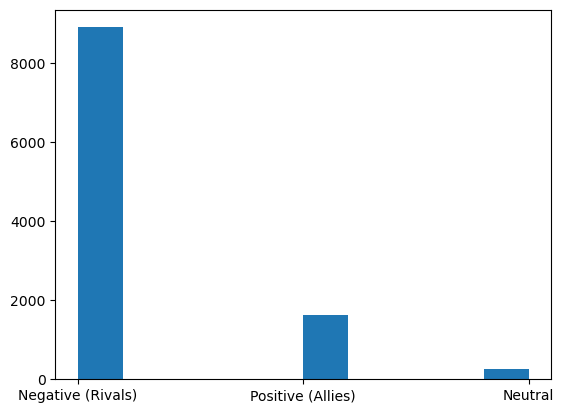

In [6]:
plt.hist(df_articles.sentiment)

nltk vader does not capture sarcasm (it's based on a pre-defined lexicon) but InsightCrime articles do not contain sarcasm (most likely)